In [1]:
# meta = read.csv('PRDX1screen_sampleIDs.csv')

# counts = read.table('results/counts.txt')
# counts = counts[,c('target',meta$index)]

# counts

In [92]:
import numpy as np

In [4]:
import pandas as pd 
import anndata as ad
import scanpy as sc

In [177]:
import matplotlib.pyplot as plt

In [363]:
sc.settings.set_figure_params(dpi=150, frameon=False, figsize=(3, 3), color_map='RdGy', facecolor='white')

In [38]:
meta = pd.read_csv('PRDX1screen_sampleIDs.csv').set_index('index')

In [73]:
library = pd.read_csv('dJR051_library_1_2_unbalanced.csv',index_col=0).set_index('sgID_AB')

In [39]:
counts = pd.read_csv('results/counts.txt',sep='\t',index_col=0)

In [551]:
adata = ad.AnnData(
    X = counts.drop('target',axis=1).loc[:,meta.index].T,
    # var = library, 
    var = counts[['target']],
    obs = meta,
    dtype=int
)

adata.var['targetType'] = ''
adata.var.loc[adata.var.target.eq('non-targeting'),'targetType']  = 'negCtrl'
adata.var.loc[~adata.var.target.eq('non-targeting'),'targetType'] = 'gene'
adata.var.index.name = None

adata.layers['log2(x+1)'] = np.log2(adata.X + 1)



In [552]:
almost_black = '#111111'

dark2 = ['#1b9e77',
         '#d95f02',
         '#7570b3',
         '#e7298a',
         '#66a61e',
         '#e6ab02',
         '#a6761d',
         '#666666']

### replicate scatter plots

In [553]:
def draw_scatter(adata, x, y, title, ax):
    bdata = adata[[x, y],:].copy()
    
    bdata.obs.index = [f'Replicate {str(r)}' for r in bdata.obs.rep.to_list()]
    x_lab, y_lab = [f'Replicate {str(r)}' for r in bdata.obs.rep.to_list()]
    
    sc.pl.scatter(
        bdata,
        x_lab, y_lab,
        layers='log2(x+1)',
        legend_fontsize='xx-large',
        palette=[almost_black,'#BFBFBF'],
        color='targetType',
        title=title,
        size=10,
        show=False,
        ax = ax
    )
    ax.set_ylim(-1,18)
    ax.set_xlim(-1,18)
    ax.tick_params(axis='both', labelsize=10)
    ax.get_legend().remove()
    
    ax.grid(False)

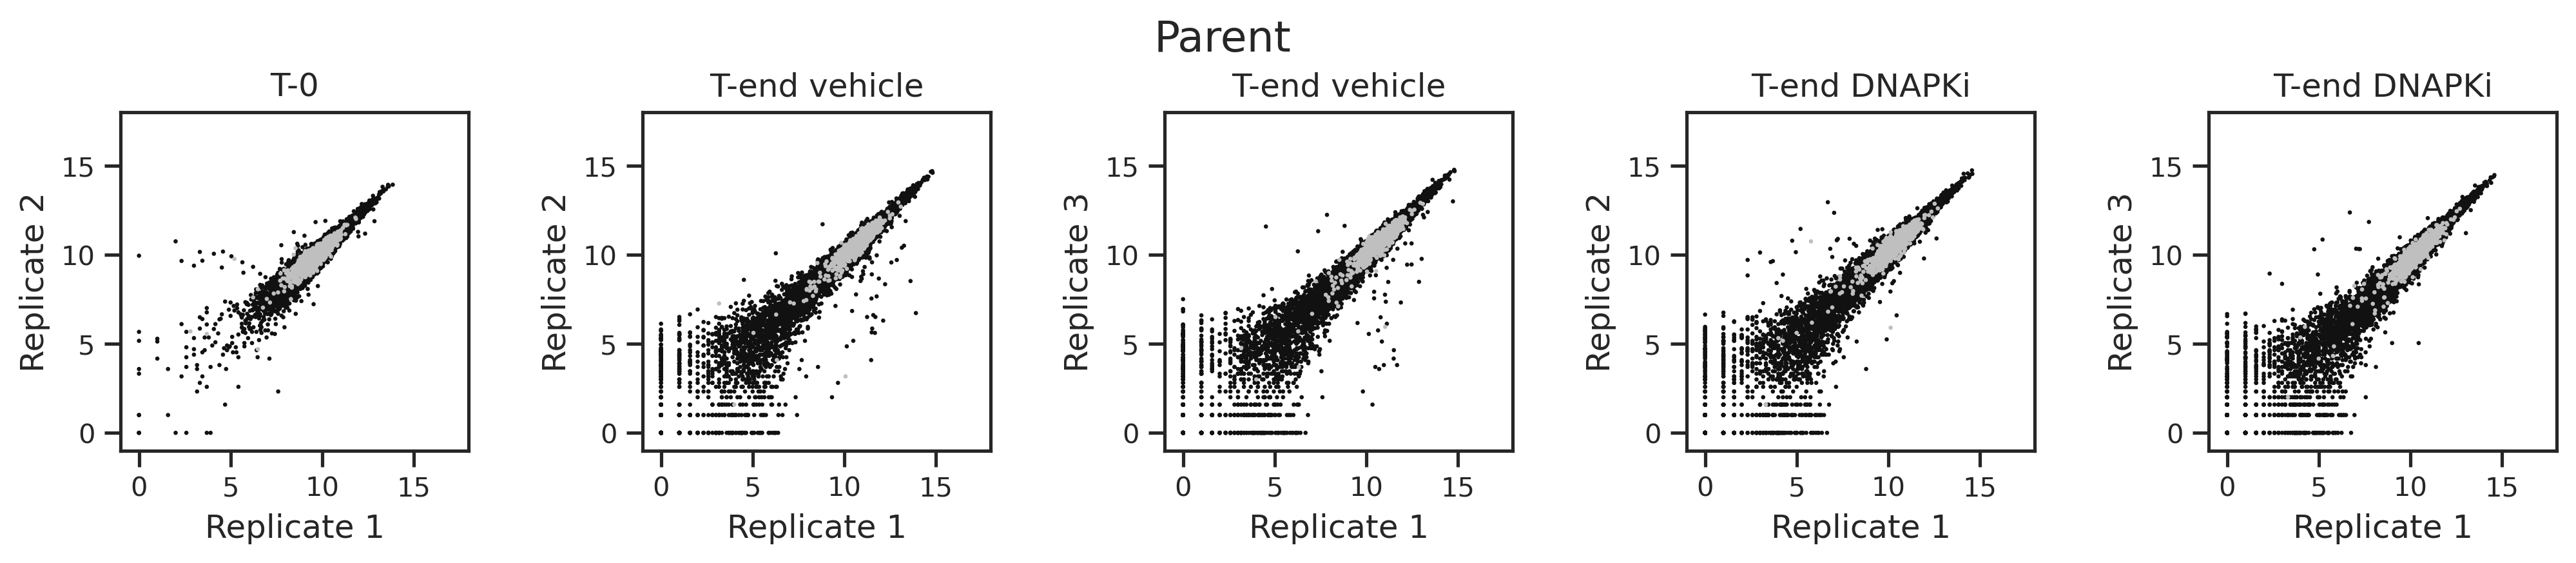

In [554]:
fig, axes = plt.subplots(ncols=5,
                         figsize=(15, 2.3), 
                         gridspec_kw={'wspace': 0.5, 'left': 0.12}, 
                         # sharey=True
                        )
draw_scatter(adata, 'i01','i02','T-0', axes[0])

draw_scatter(adata, 'i03','i04','T-end vehicle', axes[1])
draw_scatter(adata, 'i03','i05','T-end vehicle', axes[2])

draw_scatter(adata, 'i06','i07','T-end DNAPKi', axes[3])
draw_scatter(adata, 'i06','i08','T-end DNAPKi', axes[4])

fig.suptitle('Parent',size=16, y=1.12)
plt.savefig('counts_qc_parent_screen.pdf',bbox_inches='tight')
plt.show()

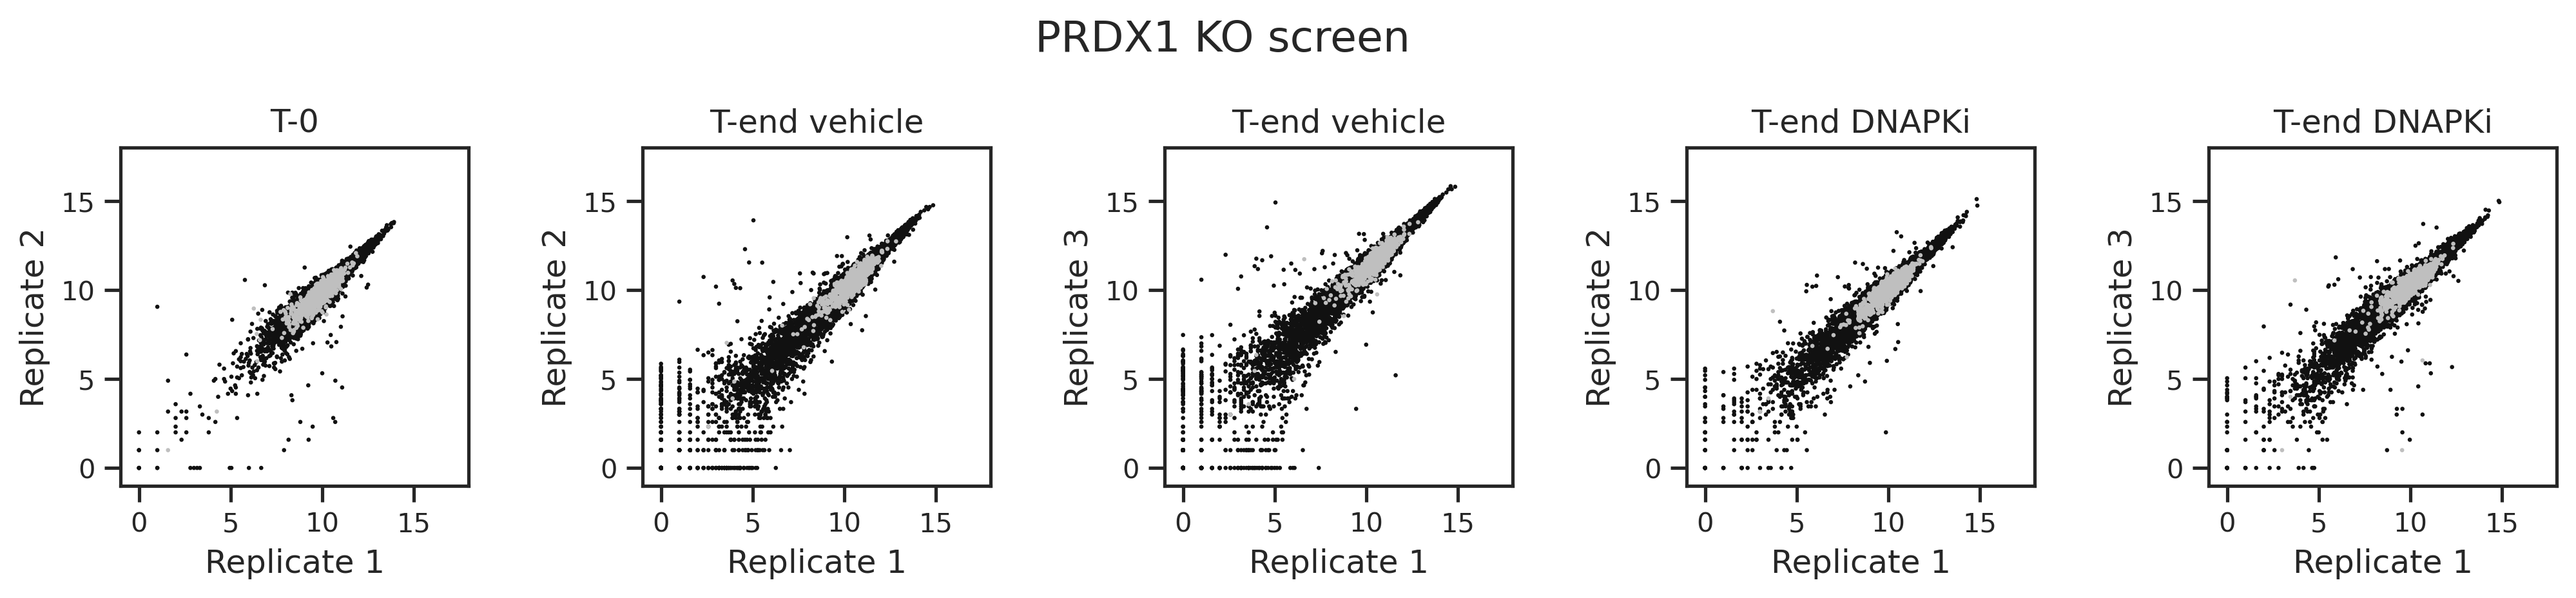

In [555]:
fig, axes = plt.subplots(ncols=5,
                         figsize=(15, 2.3), 
                         gridspec_kw={
                             'wspace': 0.5, 
                             'left': 0.12}, 
                         # sharey=True
                        )
draw_scatter(adata, 'i09','i10','T-0', axes[0])

draw_scatter(adata, 'i11','i12','T-end vehicle', axes[1])
draw_scatter(adata, 'i11','i13','T-end vehicle', axes[2])

draw_scatter(adata, 'i14','i15','T-end DNAPKi', axes[3])
draw_scatter(adata, 'i14','i16','T-end DNAPKi', axes[4])

fig.suptitle('PRDX1 KO screen',size=16, y=1.2)
plt.savefig('counts_qc_PRDX1_KO_screen.pdf',bbox_inches='tight')
plt.show()

In [567]:
target_df = adata.var.sort_values(by=['target','targetType'],ascending=True)[['target']]


pd.concat([target_df,adata.to_df(layer='log2(x+1)').T.loc[target_df.index,:]],axis=1).to_csv('results/counts_log2_norm.txt',sep='\t')

In [569]:
adata.write_h5ad('results/adata_counts.h5ad.gz')

In [531]:
# adata.var.index = adata.var.target

# adata.var_names_make_unique()

In [532]:
# adata.obs['group'] = adata.obs[['cell line','timepoint','treatment']].apply(' '.join,axis=1)

In [530]:
# ax = sc.pl.violin(adata, ["PRDX2","PRDX3","PRDX4","PRDX5","PRDX6"],
#              layer='log2(x+1)', 
#              groupby='group',rotation=90,size=4,
#                  )

# 

In [204]:
!date

Tue Apr 18 12:04:40 PDT 2023
